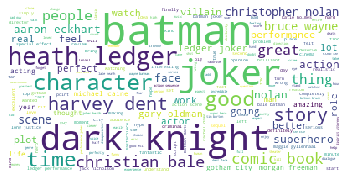

In [67]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
import gensim

corpus = pd.read_csv('3_reviews_per_movie_cleaned/The Dark Knight 2008.csv')
# corpus = pd.read_csv('3_reviews_per_movie_cleaned/Avengers: Endgame 2019.csv')
# corpus = pd.read_csv('3_reviews_per_movie_cleaned/Pirates of the Caribbean: The Curse of the Black Pearl 2003.csv')
# corpus = pd.read_csv('3_reviews_per_movie_cleaned/12 Monkeys 1995.csv')

wordcloud_text = ''
text = []
word2vec_doc = []
for index, row in corpus.iterrows():
    wordcloud_text = wordcloud_text + row['review'] + ' '
    text.append(row['review'])
    word2vec_doc.append(gensim.utils.simple_preprocess(row['review']))

%matplotlib inline
wordcloud = WordCloud(background_color='white',max_font_size=50,random_state=42).generate(wordcloud_text)
print(wordcloud)

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word.png", dpi=900)

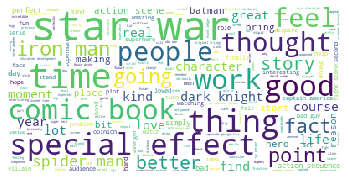

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
def TFIDF(list_of_reviews, MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    tfidf = vectorizer_x.fit_transform(list_of_reviews).toarray()
    indices = np.argsort(vectorizer_x.idf_)[::-1]
    features = vectorizer_x.get_feature_names()
    top_n = 5
    top_features = [features[i] for i in indices[:top_n]]
    print(top_features)
    
genre_list = ["Action"]
word_cloud_text = ""
for genre in genre_list:
    movie_names = pd.read_csv("1_movies_per_genre/{}.csv".format(genre))
    review_list = []
    
    for index, row in movie_names.iterrows():
        file_name = row["name"] + " " + str(row["year"]) + ".csv"
        movie_file = pd.read_csv("3_reviews_per_movie_cleaned/" + file_name)["review"].to_list()
        review_list += movie_file
    for rev in review_list:
        word_cloud_text += rev

%matplotlib inline
wordcloud = WordCloud(background_color='white',max_font_size=50,random_state=42).generate(word_cloud_text)
print(wordcloud)

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word.png", dpi=900)        
#     TFIDF(review_list)
#     print(len(review_list))

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def TFIDF(list_of_reviews, MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    tfidf = vectorizer_x.fit_transform(list_of_reviews).toarray()
    indices = np.argsort(vectorizer_x.idf_)[::-1]
    features = vectorizer_x.get_feature_names()
    top_n = 50
    top_features = [features[i] for i in indices[::-1]]
    top_features = top_features[:top_n]
    print(top_features)
    
genre_list = [
    'Action',
#     'Adventure',
#     'Animation',
#     'Biography',
#     'Comedy',
    'Crime',
    'Drama',
    'Romance',
    'War'
#     'Fantasy',
#     'History',
#     'Horror',
#     'Music',
#     'Mystery',
#     'Romance',
#     'Sci-Fi'
]
word_cloud_text = ""
x_train = pd.read_csv('5_test_train_dataset/x_test.csv')['review']
x_test = pd.read_csv('5_test_train_dataset/x_train.csv')['review']
y_train = pd.read_csv('5_test_train_dataset/y_test.csv')
y_test = pd.read_csv('5_test_train_dataset/y_train.csv')


for genre in genre_list:
    review_list = []
    word2vec_doc = []
    for idx, row in y_test.iterrows():
        if row[genre] == 1:
            review_list.append(x_train[idx])
            word2vec_doc.append(gensim.utils.simple_preprocess(x_train[idx]))

    for idx, row in y_train.iterrows():
        if row[genre] == 1:
            review_list.append(x_train[idx])
            word2vec_doc.append(gensim.utils.simple_preprocess(x_train[idx]))

    model = gensim.models.Word2Vec(
            word2vec_doc,
            size=50,
            window=5,
            min_count=2,
            workers=10,
            iter=10)
    if genre=="Sci-Fi":
        genre="sci"
    w1 = genre.lower()
    print(genre)
    words,freq  = model.wv.most_similar(positive=w1)
    print(words)



Action


ValueError: too many values to unpack (expected 2)

[Text(0, 0, 'batman'),
 Text(0, 0, 'joker'),
 Text(0, 0, 'dark'),
 Text(0, 0, 'ledger'),
 Text(0, 0, 'knight'),
 Text(0, 0, 'character'),
 Text(0, 0, 'heath'),
 Text(0, 0, 'good'),
 Text(0, 0, 'time'),
 Text(0, 0, 'performance'),
 Text(0, 0, 'great'),
 Text(0, 0, 'nolan'),
 Text(0, 0, 'action'),
 Text(0, 0, 'bale'),
 Text(0, 0, 'scene'),
 Text(0, 0, 'dent'),
 Text(0, 0, 'comic'),
 Text(0, 0, 'story'),
 Text(0, 0, 'harvey'),
 Text(0, 0, 'people')]

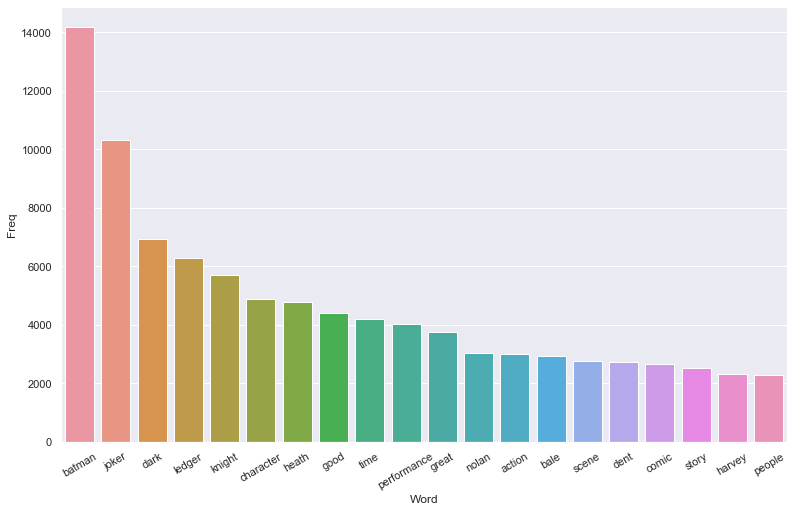

In [68]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


#Most frequently occuring words
def get_top_n_k_gram_words(corpus, k1=None, k2=None, n=None):
    vec = CountVectorizer(ngram_range=(k1,k2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot


top_words = get_top_n_k_gram_words(text, k1=1, k2=1, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'dark knight'),
 Text(0, 0, 'heath ledger'),
 Text(0, 0, 'harvey dent'),
 Text(0, 0, 'christian bale'),
 Text(0, 0, 'comic book'),
 Text(0, 0, 'bruce wayne'),
 Text(0, 0, 'aaron eckhart'),
 Text(0, 0, 'christopher nolan'),
 Text(0, 0, 'gary oldman'),
 Text(0, 0, 'ledger joker'),
 Text(0, 0, 'gotham city'),
 Text(0, 0, 'morgan freeman'),
 Text(0, 0, 'michael caine'),
 Text(0, 0, 'maggie gyllenhaal'),
 Text(0, 0, 'ledger performance'),
 Text(0, 0, 'katie holmes'),
 Text(0, 0, 'rachel dawes'),
 Text(0, 0, 'batman joker'),
 Text(0, 0, 'special effect'),
 Text(0, 0, 'jack nicholson')]

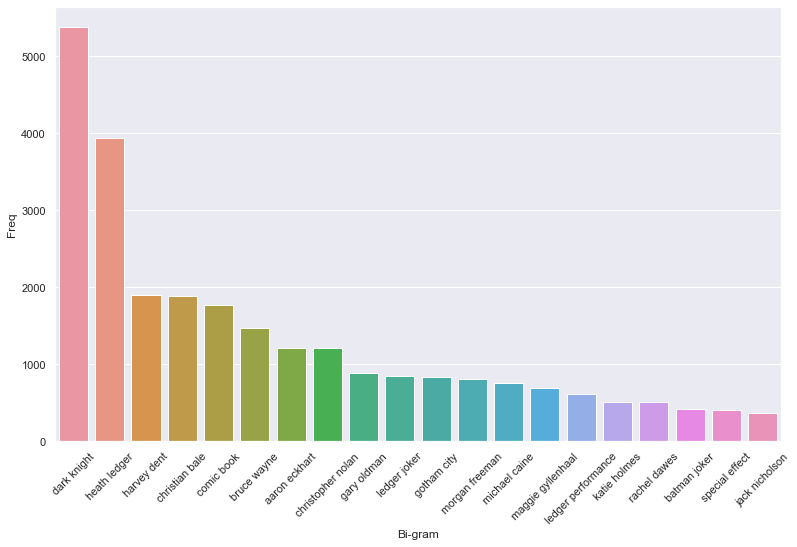

In [69]:
top2_words = get_top_n_k_gram_words(text, k1=2, k2=2, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

[Text(0, 0, 'crane janet leigh'),
 Text(0, 0, 'norman bates anthony'),
 Text(0, 0, 'bates anthony perkins'),
 Text(0, 0, 'marion crane janet'),
 Text(0, 0, 'famous shower scene'),
 Text(0, 0, 'anthony perkins norman'),
 Text(0, 0, 'alfred hitchcock psycho'),
 Text(0, 0, 'infamous shower scene'),
 Text(0, 0, 'perkins norman bates'),
 Text(0, 0, 'vera mile john'),
 Text(0, 0, 'mile john gavin'),
 Text(0, 0, 'bates motel meet'),
 Text(0, 0, 'perkins janet leigh'),
 Text(0, 0, 'sam loomis john'),
 Text(0, 0, 'loomis john gavin'),
 Text(0, 0, 'stop bates motel'),
 Text(0, 0, 'leigh anthony perkins'),
 Text(0, 0, 'janet leigh anthony'),
 Text(0, 0, 'director alfred hitchcock'),
 Text(0, 0, 'marions sister lila')]

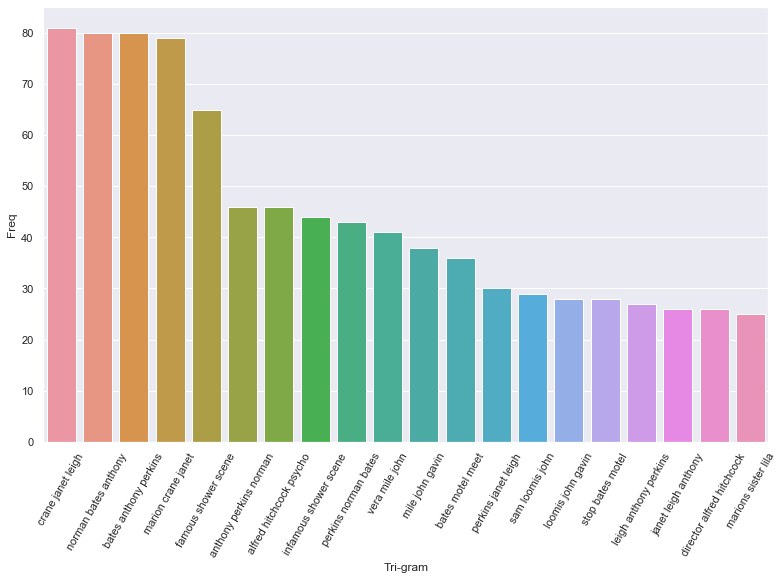

In [4]:
top2_words = get_top_n_k_gram_words(text, k1=3, k2=3, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Tri-gram", "Freq"]
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=60)

In [39]:
model = gensim.models.Word2Vec(
        word2vec_doc,
        size=50,
        window=5,
        min_count=2,
        workers=10,
        iter=10)

[Text(0, 0, 'bates'),
 Text(0, 0, 'owner'),
 Text(0, 0, 'reclusive'),
 Text(0, 0, 'proprietor'),
 Text(0, 0, 'domination'),
 Text(0, 0, 'mannered'),
 Text(0, 0, 'owned'),
 Text(0, 0, 'motel'),
 Text(0, 0, 'mother'),
 Text(0, 0, 'caretaker')]

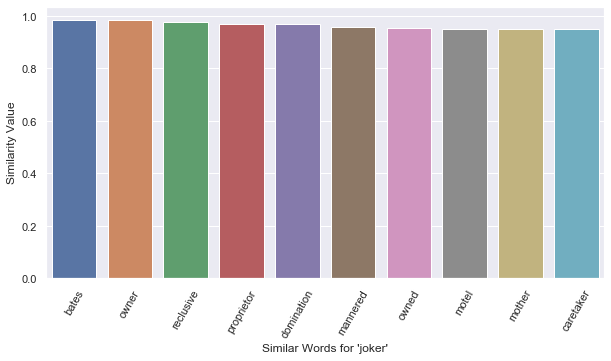

In [6]:
# w1 = 'joker'
# w1 = 'thanos'
# w1 = 'captain'
w1 = 'norman'
similar_words = model.wv.most_similar(positive=w1)
similar_words_df = pd.DataFrame(similar_words)
similar_words_df.columns=["Similar Words for 'joker'", "Similarity Value"]
sns.set(rc={'figure.figsize':(10,5)})
h=sns.barplot(x="Similar Words for 'joker'", y="Similarity Value", data=similar_words_df)
h.set_xticklabels(h.get_xticklabels(), rotation=60)

In [7]:
# w1 = 'nolan'
# w1 = 'infinity'
# w1 = 'barbossa'
w1 = 'mother'
model.wv.most_similar(positive=w1)

[('motel', 0.9783812165260315),
 ('owner', 0.9710365533828735),
 ('domination', 0.9650969505310059),
 ('controlling', 0.964006245136261),
 ('house', 0.9548112154006958),
 ('proprietor', 0.9517995119094849),
 ('norman', 0.950655460357666),
 ('mannered', 0.95042484998703),
 ('meet', 0.9500753879547119),
 ('night', 0.9468671679496765)]

In [8]:
# w1 = 'rachel'
# w1 = 'mcu'
# w1 = 'turner'
w1 = 'hitchcock'
model.wv.most_similar(positive=w1)

[('directed', 0.988887369632721),
 ('director', 0.9867878556251526),
 ('the', 0.9813611507415771),
 ('genius', 0.9783616065979004),
 ('captivated', 0.9731712937355042),
 ('psycho', 0.9702433347702026),
 ('master', 0.9695904850959778),
 ('masterpiece', 0.9675730466842651),
 ('alfred', 0.9622011184692383),
 ('masterpeice', 0.9610049724578857)]

In [40]:
w1 = 'action'
model.wv.most_similar(positive=w1)

[('exciting', 0.7484170198440552),
 ('suspense', 0.6973554491996765),
 ('thrill', 0.6908778548240662),
 ('paced', 0.6507607698440552),
 ('suspenseful', 0.6354548335075378),
 ('thrilling', 0.6191368103027344),
 ('packed', 0.6166129112243652),
 ('finale', 0.6103190183639526),
 ('intense', 0.6023772358894348),
 ('thriller', 0.5981610417366028)]

In [41]:
w1 = 'horror'
model.wv.most_similar(positive=w1)

[('noncommittal', 0.8143471479415894),
 ('slasher', 0.8080294132232666),
 ('sci', 0.7951568365097046),
 ('thriller', 0.7926976680755615),
 ('darkness', 0.7816852331161499),
 ('genre', 0.7808530330657959),
 ('parody', 0.7705988883972168),
 ('gore', 0.7658517360687256),
 ('spoof', 0.7634825706481934),
 ('dawn', 0.7476379871368408)]

In [88]:
w1 = 'sport'
model.wv.most_similar(positive=w1)

[('humor', 0.9555056095123291),
 ('tacky', 0.9536393880844116),
 ('advantage', 0.9517881274223328),
 ('photograph', 0.9508860111236572),
 ('denied', 0.9505755305290222),
 ('accentuated', 0.9505449533462524),
 ('provocative', 0.950405478477478),
 ('reasonable', 0.9503623843193054),
 ('ford', 0.9478639364242554),
 ('gray', 0.9478535652160645)]

In [89]:
w1 = 'romance'
model.wv.most_similar(positive=w1)

[('pale', 0.9952014088630676),
 ('cultural', 0.9942280054092407),
 ('amount', 0.9940911531448364),
 ('involved', 0.9940249919891357),
 ('song', 0.9937839508056641),
 ('exact', 0.9931142330169678),
 ('greed', 0.9928455352783203),
 ('advance', 0.9926496744155884),
 ('beloved', 0.9925244450569153),
 ('paper', 0.9923592209815979)]

In [90]:
w1 = 'drama'
model.wv.most_similar(positive=w1)

[('term', 0.9982011914253235),
 ('decade', 0.997566819190979),
 ('spoiled', 0.9974079132080078),
 ('rated', 0.9973306655883789),
 ('unique', 0.9970766305923462),
 ('favourite', 0.9970548748970032),
 ('remain', 0.9968903064727783),
 ('age', 0.9965497851371765),
 ('culture', 0.9965015053749084),
 ('study', 0.9965006709098816)]

In [43]:
w1 = 'comedy'
model.wv.most_similar(positive=w1)

[('genre', 0.7155649065971375),
 ('flick', 0.7048012018203735),
 ('romp', 0.6829089522361755),
 ('rom', 0.67454594373703),
 ('comedic', 0.6600306034088135),
 ('farce', 0.6562971472740173),
 ('coms', 0.6468485593795776),
 ('humor', 0.6443291902542114),
 ('humour', 0.6427370309829712),
 ('soppy', 0.6271448731422424)]